In [1]:
library(EnhancedVolcano)
library(repr)

Loading required package: ggplot2

Loading required package: ggrepel



In [2]:
df <- read.table('./viz/RNAseq_genes_results.csv',sep=',', header=TRUE)

In [3]:
head(df)

,id,feature,fc,pval,qval,geneNames
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,MSTRG.8718,gene,0.6499972,6.129203e-08,0.0003241123,IGFBP5
2,MSTRG.10612,gene,0.7954154,2.956885e-07,0.0006967601,EIF4A2
3,MSTRG.14107,gene,0.8575836,4.618331e-07,0.0006967601,GOLGA7
4,MSTRG.14911,gene,1.1812357,5.287916e-07,0.0006967601,ENG
5,MSTRG.13317,gene,0.7590080,7.201253e-07,0.0006967601,GPNMB
6,MSTRG.2880,gene,1.2726364,7.905750e-07,0.0006967601,TAGLN


In [4]:
rownames(df) <- make.names(df[,6], unique=TRUE)
df[,6] <- NULL

In [7]:
df['log2FC'] <- log2(df[,3])

In [8]:
head(df)

,id,feature,fc,pval,qval,log2FC
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
IGFBP5,MSTRG.8718,gene,0.6499972,6.129203e-08,0.0003241123,-0.6214945
EIF4A2,MSTRG.10612,gene,0.7954154,2.956885e-07,0.0006967601,-0.3302197
GOLGA7,MSTRG.14107,gene,0.8575836,4.618331e-07,0.0006967601,-0.2216508
ENG,MSTRG.14911,gene,1.1812357,5.287916e-07,0.0006967601,0.2402968
GPNMB,MSTRG.13317,gene,0.7590080,7.201253e-07,0.0006967601,-0.3978130
TAGLN,MSTRG.2880,gene,1.2726364,7.905750e-07,0.0006967601,0.3478203


In [9]:
length(rownames(df))

[1] 5523

In [10]:
options(repr.plot.width=15, repr.plot.height=15)

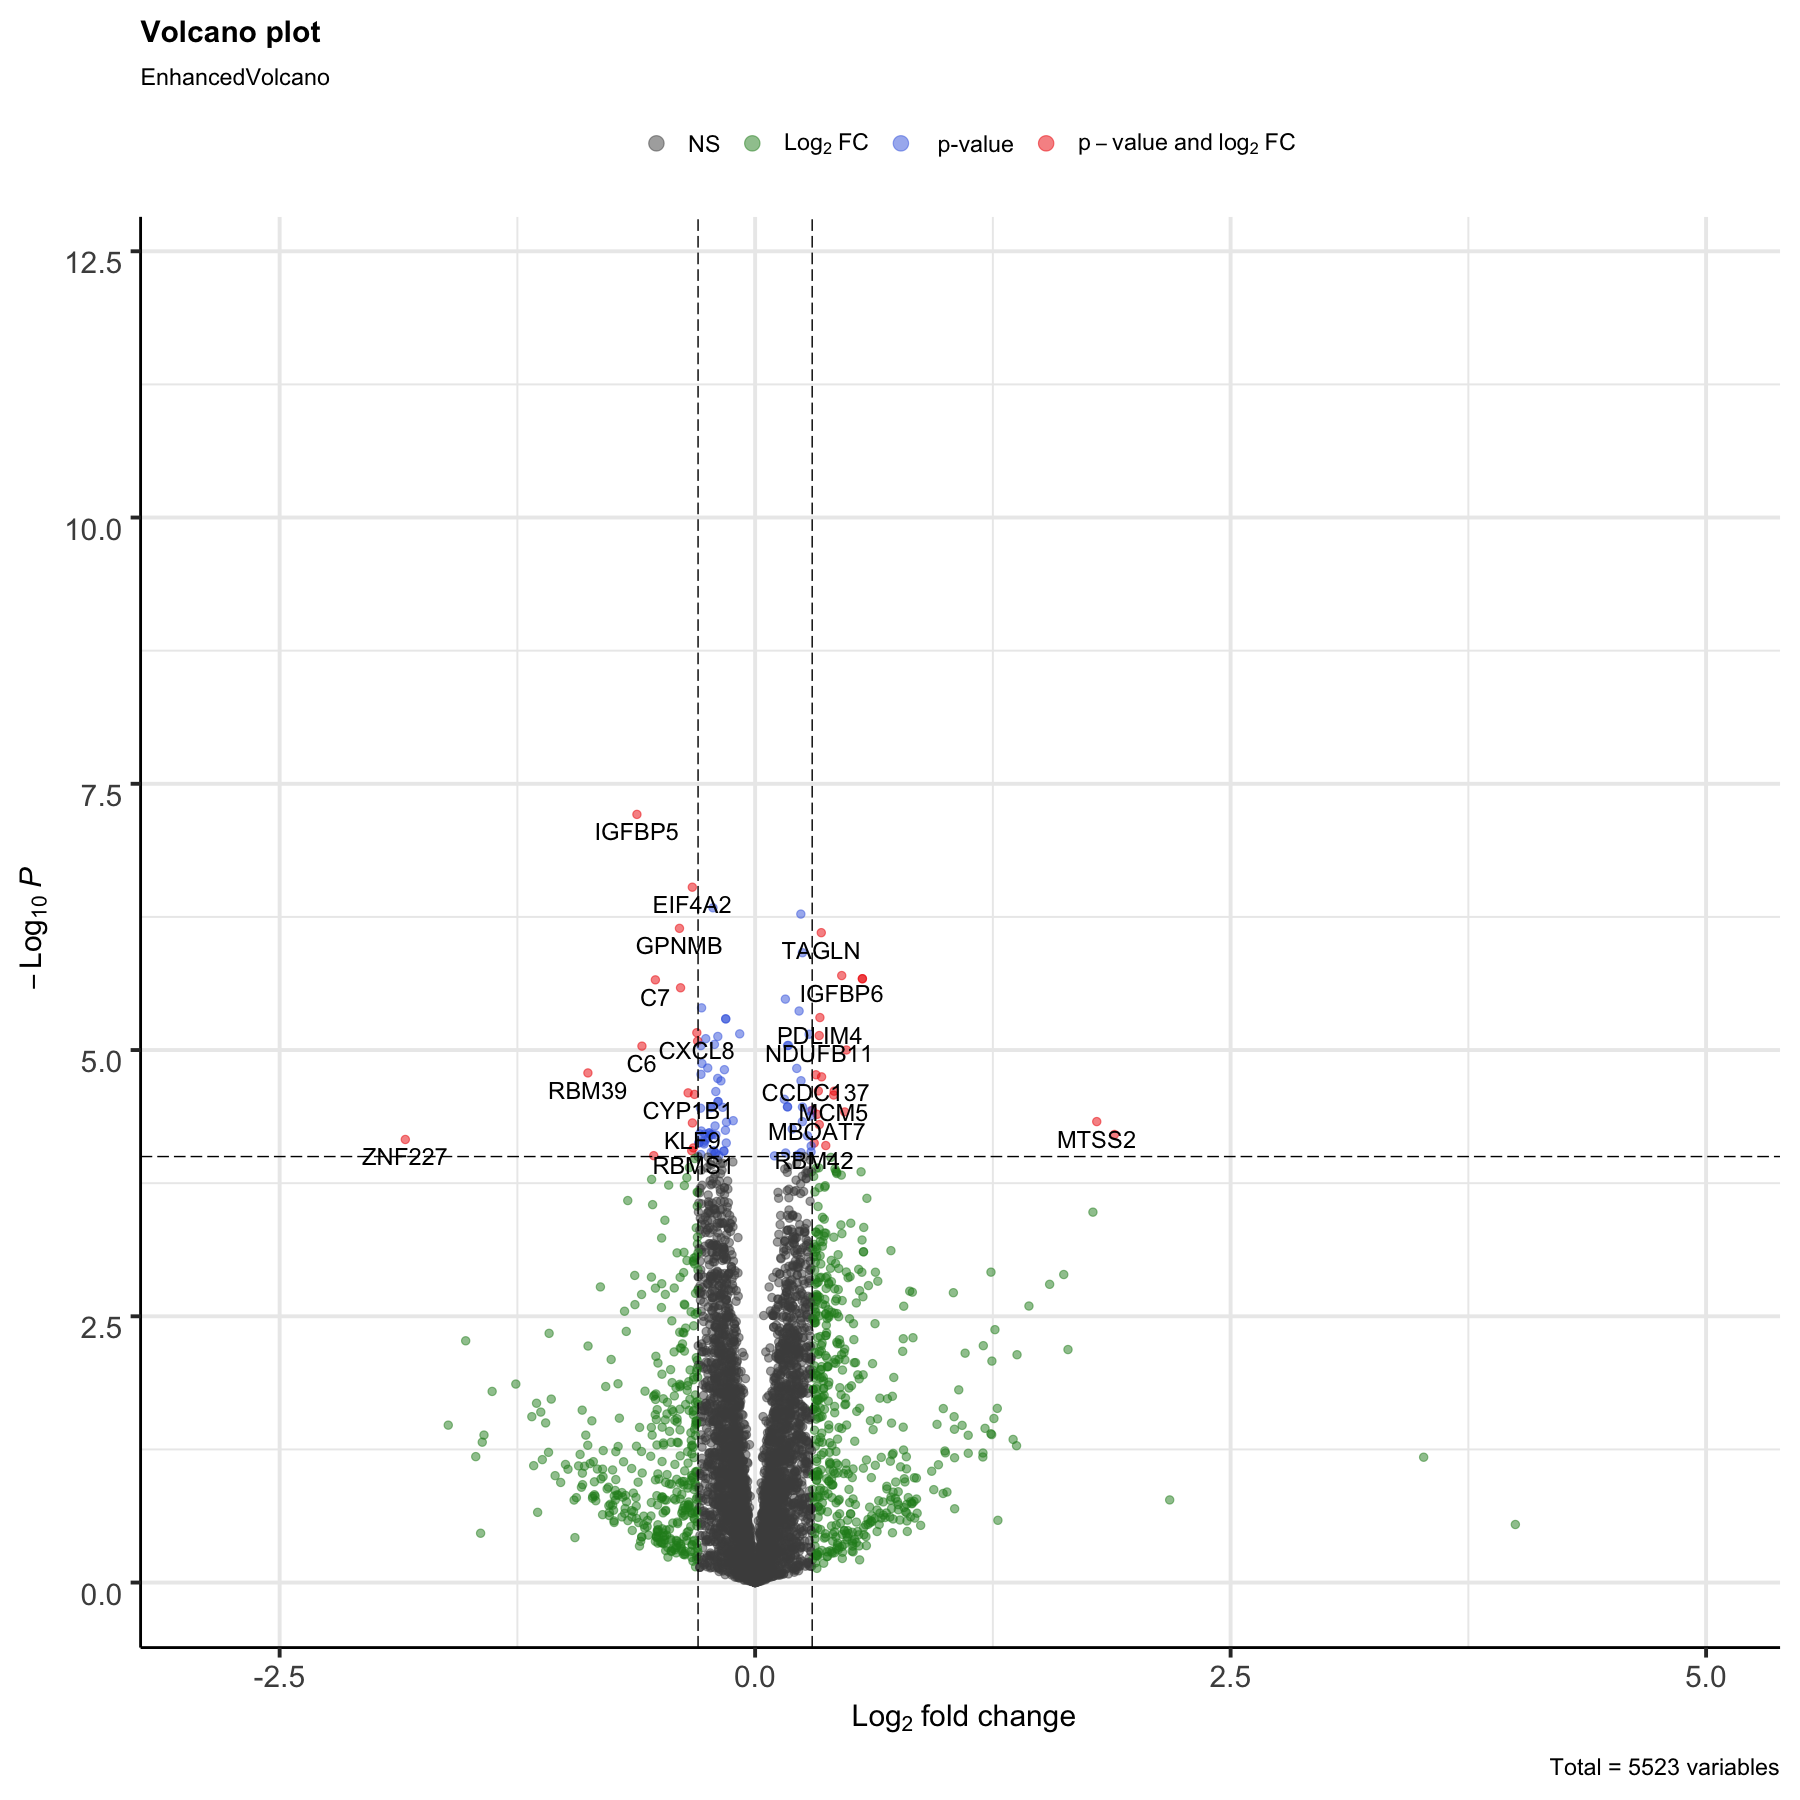

In [11]:
EnhancedVolcano(df,
    lab = rownames(df),
    x = 'log2FC',
    y = 'pval',
    pointSize = 2.0,
    pCutoff = 10e-5,
    FCcutoff = 0.3,
    labSize = 5.0)

In [14]:
# load libraries
library(ggplot2)
library(viridis)

# load in the ballgown DE data
de_genes <- read.table('./viz/RNAseq_genes_results.csv',sep=',', header=TRUE)

In [16]:
head(de_genes)

,id,feature,fc,pval,qval,geneNames
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,MSTRG.8718,gene,0.6499972,6.129203e-08,0.0003241123,IGFBP5
2,MSTRG.10612,gene,0.7954154,2.956885e-07,0.0006967601,EIF4A2
3,MSTRG.14107,gene,0.8575836,4.618331e-07,0.0006967601,GOLGA7
4,MSTRG.14911,gene,1.1812357,5.287916e-07,0.0006967601,ENG
5,MSTRG.13317,gene,0.7590080,7.201253e-07,0.0006967601,GPNMB
6,MSTRG.2880,gene,1.2726364,7.905750e-07,0.0006967601,TAGLN


In [17]:
# load in the FPKM values from stringtie
expr_tumor <- read.delim("./viz/RNAseq_Vehicle_abundance.out")

In [19]:
head(expr_tumor)

,Gene.ID,Gene.Name,Reference,Strand,Start,End,Coverage,FPKM,TPM
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,MIR1302-2,MIR1302-2,chr1,+,30366,30503,0.000000,0.000000,0.000000
2,MIR1302-9,MIR1302-9,chr1,+,30366,30503,0.000000,0.000000,0.000000
3,MIR1302-10,MIR1302-10,chr1,+,30366,30503,0.028986,0.001778,0.005578
4,MIR1302-11,MIR1302-11,chr1,+,30366,30503,0.000000,0.000000,0.000000
5,MSTRG.5,LOC102725121,chr1,+,11869,14409,0.000000,0.000000,0.000000
6,MSTRG.6,WASH7P,chr1,-,14362,29370,34.256008,5.696251,17.872095


In [20]:
# merge the expression and DE results
merged_results <- merge(de_genes, expr_tumor, by.x=c("id"), by.y=c("Gene.ID"), all.x=TRUE)

In [21]:
head(merged_results)

,id,feature,fc,pval,qval,geneNames,Gene.Name,Reference,Strand,Start,End,Coverage,FPKM,TPM
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,FLT3LG,gene,3.0795062,0.001281680,0.01547380,FLT3LG,FLT3LG,chr19,+,49977472,49989488,40.10534,2.706701,8.492325
2,MSTRG.10001,gene,1.0409728,0.350755893,0.50955966,LARS2,LARS2,chr3,+,45430068,45590899,78.36092,4.818723,15.118834
3,MSTRG.10006,gene,0.9296894,0.298649062,0.45564231,SACM1L,SACM1L,chr3,+,45730888,45786901,97.84140,6.105405,19.155825
4,MSTRG.10011,gene,1.1089869,0.172115942,0.31901476,CCDC12,CCDC12,chr3,-,46963220,47023500,170.45279,14.236438,44.667091
5,MSTRG.10014,gene,1.1114455,0.006466380,0.03854927,SCAP,SCAP,chr3,-,47455171,47517431,199.65796,12.374335,38.824711
6,MSTRG.10015,gene,1.1292432,0.008673304,0.04505347,ELP6,ELP6,chr3,-,47536571,47555202,139.92587,14.132728,44.341702


In [22]:
# log2 the fold change
merged_results$log2_fc <- log2(as.numeric(merged_results$fc))

In [23]:
# remove entries with an FPKM of 0
merged_results <- merged_results[merged_results$FPKM > 1,]

Warning message:
“Removed 51 rows containing missing values (geom_point).”


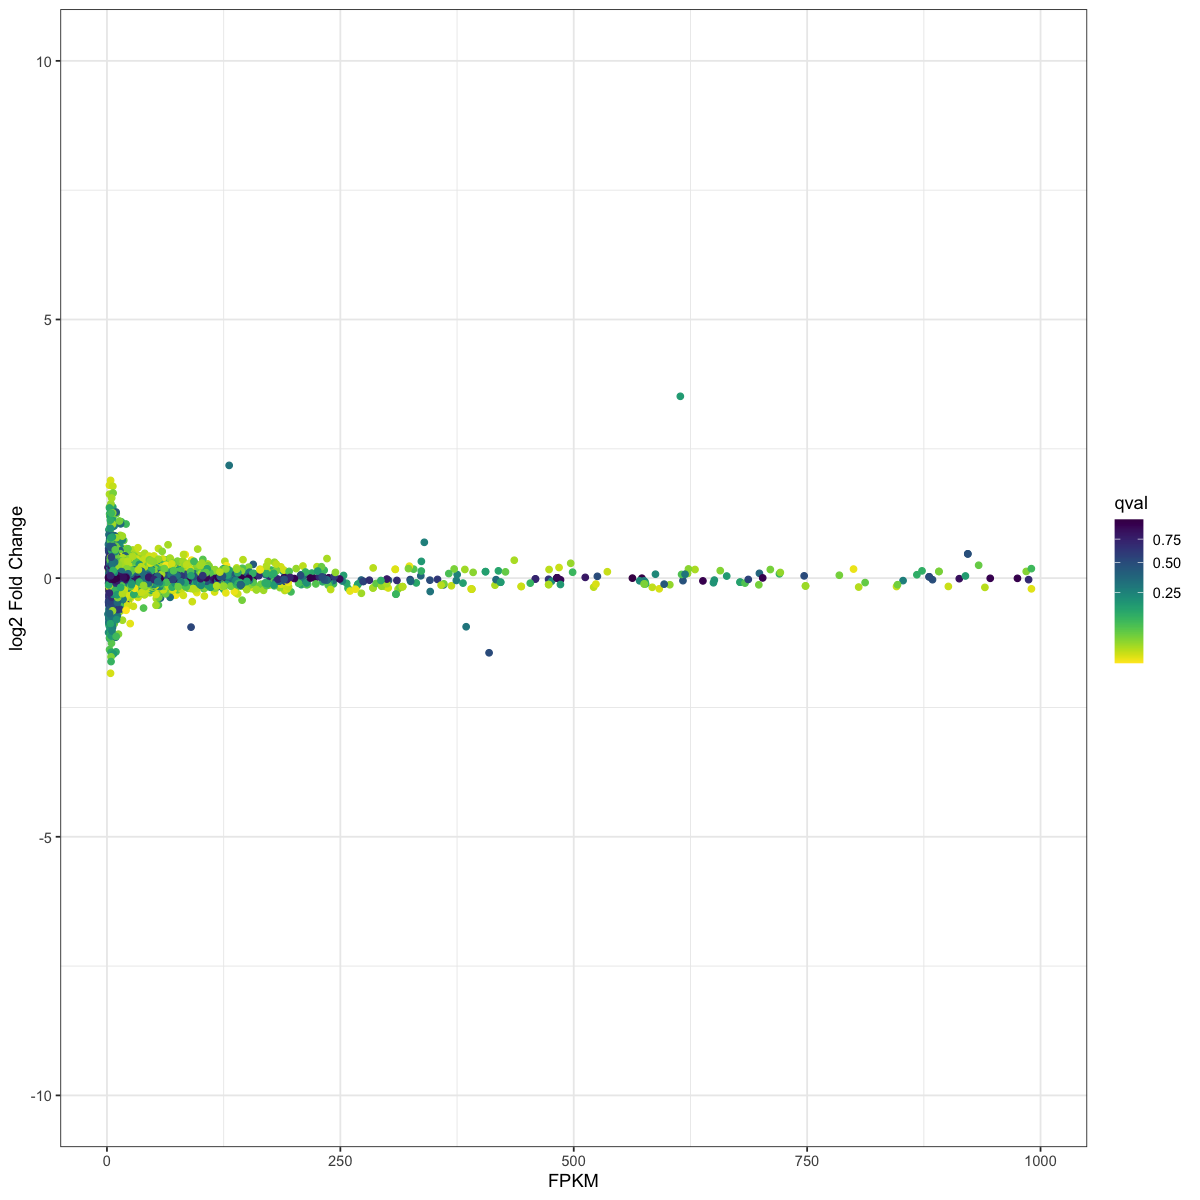

In [26]:
options(repr.plot.width=10, repr.plot.height=10)
# create an MA plot for both genes and transcripts
ggplot(data=merged_results) + geom_point(aes(y=log2_fc, x=FPKM, color=qval)) + ylim(c(-10, 10)) + xlim(c(0, 1000)) + scale_colour_viridis(direction=-1, trans='sqrt') + theme_bw() + xlab("FPKM") + ylab("log2 Fold Change")